<a href="https://colab.research.google.com/github/pahrul23/pahrul-skripsi/blob/main/Hasil_dan_Pembahasan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **INDODANA**

In [22]:
import pandas as pd

# Membaca data dari file csv
df = pd.read_csv('/content/drive/MyDrive/SKRIPSI/indodanaHasil.csv')

In [23]:
df

,userName,score,at,content,sentimentRF,sentimentXGB,sentimentSVM,sentimentSV
0,Rhegita Arrum Syafitri,5,2023-03-23 13:39:52,bagusss,2,2,2,2
1,Yusmanda Asmara,4,2023-03-23 13:30:36,mantap,2,2,2,2
2,tomi tulus,3,2023-03-23 13:24:14,untuk saat ini kasih 3 bintang dlu kalau udah ...,2,1,2,1
3,Ariscaryana Ryana,3,2023-03-23 13:16:46,semoga d acc ya,2,0,0,1
4,LYANDIJAYAMAULANA,5,2023-03-23 13:16:18,saya pinjam 8 jta kok cair nya 5 jta saya mau ...,2,1,1,1
...,...,...,...,...,...,...,...,...
9995,Imam Bukhori,5,2023-02-26 17:23:10,mantaf,2,2,2,2
9996,Tisna Joe,5,2023-02-26 17:21:05,mudah dan cepat,2,2,2,2
9997,Gabriella Wibowo,5,2023-02-26 17:19:57,bagus,2,2,2,2
9998,PRIVATE NUMBER,5,2023-02-26 17:19:08,semoga bisa membantu,2,2,2,2


In [24]:
import matplotlib.pyplot as plt

            sentimentSV
at                     
2023-02-26           66
2023-02-27          576
2023-02-28          626
2023-03-01          551
2023-03-02          489
2023-03-03          567
2023-03-04          568
2023-03-05          561
2023-03-06          526
2023-03-07          576
2023-03-08          591
2023-03-09          550
2023-03-10          529
2023-03-11          441
2023-03-12          387
2023-03-13          460
2023-03-14          571
2023-03-15          592
2023-03-16          599
2023-03-17          547
2023-03-18          478
2023-03-19          434
2023-03-20          535
2023-03-21          506
2023-03-22          418
2023-03-23          289


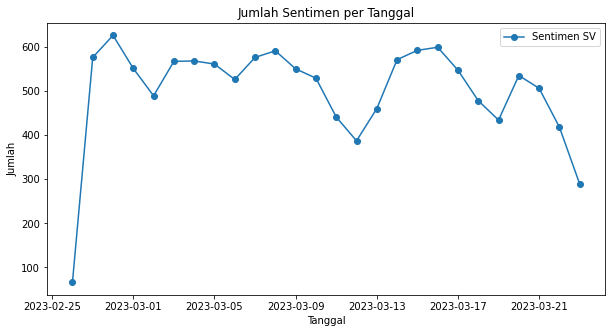

In [25]:
# Mengubah tipe data kolom 'at' menjadi datetime
df['at'] = pd.to_datetime(df['at']).dt.date

# Menghitung jumlah sentimen berdasarkan tanggal
df_sentiment = df.groupby('at')[['sentimentSV']].sum()

# Menghitung jumlah sentimen berdasarkan tanggal dan kelas
df_sentiment_class = df.groupby(['at', 'sentimentSV']).size().unstack(fill_value=0)

# Print jumlah sentimen berdasarkan tanggal
print(df_sentiment)

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 5))

# Memplot data
ax.plot(df_sentiment.index, df_sentiment['sentimentSV'], marker='o', label='Sentimen SV')

# Menambahkan label pada sumbu-sumbu dan judul
ax.set_xlabel('Tanggal')
ax.set_ylabel('Jumlah')
ax.set_title('Jumlah Sentimen per Tanggal')

# Menambahkan legend
ax.legend()

# Menampilkan plot
plt.show()

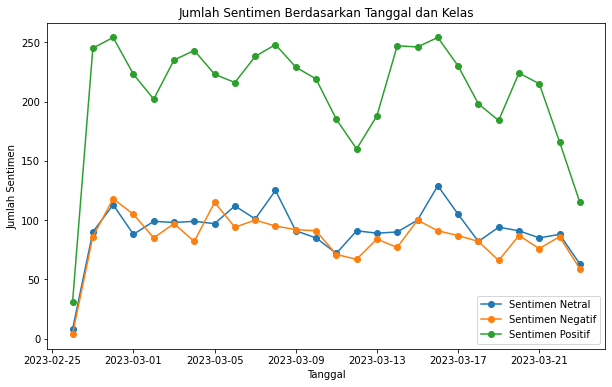

In [26]:
# Mengubah kolom 'at' menjadi tipe datetime
df['at'] = pd.to_datetime(df['at'])

# Mengubah kolom 'at' menjadi indeks dataframe
df = df.set_index('at')

# Menghitung jumlah sentimen berdasarkan kelas 0, 1, dan 2 pada setiap tanggal
sentimen_count = pd.pivot_table(df, values='sentimentSV', index=df.index.date, columns=df['sentimentSV'], aggfunc='count', fill_value=0)

# Mengubah nama kolom dari angka ke string
sentimen_count.columns = ['Sentimen Netral', 'Sentimen Negatif', 'Sentimen Positif']

# Membuat plot jumlah sentimen berdasarkan tanggal dan kelas
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sentimen_count.index, sentimen_count['Sentimen Netral'], marker='o', label='Sentimen Netral')
ax.plot(sentimen_count.index, sentimen_count['Sentimen Negatif'], marker='o', label='Sentimen Negatif')
ax.plot(sentimen_count.index, sentimen_count['Sentimen Positif'], marker='o', label='Sentimen Positif')

# Menambahkan judul dan label sumbu pada plot
ax.set_title('Jumlah Sentimen Berdasarkan Tanggal dan Kelas')
ax.set_xlabel('Tanggal')
ax.set_ylabel('Jumlah Sentimen')
ax.legend()

# Menampilkan plot
plt.show()

In [ ]:
sentimen_count

,Sentimen Netral,Sentimen Negatif,Sentimen Positif
2023-02-26,8,4,31
2023-02-27,90,86,245
2023-02-28,113,118,254
2023-03-01,88,105,223
2023-03-02,99,85,202
2023-03-03,98,97,235
2023-03-04,99,82,243
2023-03-05,97,115,223
2023-03-06,112,94,216
2023-03-07,101,100,238


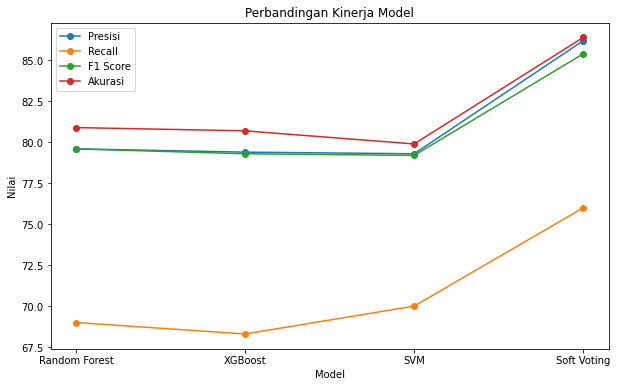

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['Random Forest', 'XGBoost', 'SVM', 'Soft Voting']
presisi = [79.6, 79.4, 79.3, 86.2]
recall = [69.0, 68.3, 70.0, 76.0]
f1_score = [79.6, 79.3, 79.2, 85.4]
akurasi = [80.9, 80.7, 79.9, 86.4]

# Figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot
ax.plot(models, presisi, marker='o', label='Presisi')
ax.plot(models, recall, marker='o', label='Recall')
ax.plot(models, f1_score, marker='o', label='F1 Score')
ax.plot(models, akurasi, marker='o', label='Akurasi')

# Title and Legend
ax.set_title('Perbandingan Kinerja Model')
ax.legend()

# Axis Label
ax.set_xlabel('Model')
ax.set_ylabel('Nilai')

# Show
plt.show()


# **AKULAKU**

In [28]:
import pandas as pd

# Membaca data dari file csv
df = pd.read_csv('/content/drive/MyDrive/SKRIPSI/akulakuHasil.csv')

In [29]:
df

,userName,score,at,content,sentimentRF,sentimentXGB,sentimentSVM,sentimentSV
0,hendri Yansyah,5,2023-03-23 13:37:56,okkeeeeeee,2,2,2,1
1,Candra,5,2023-03-23 13:37:36,limit nya terlalu kecil,2,0,1,1
2,Maemunah Andi,5,2023-03-23 13:37:23,akulaku memang mantap,2,2,2,2
3,Maulana Nahda,5,2023-03-23 13:36:05,mudah dan terpercaya,2,2,2,2
4,Agus Tribusono,5,2023-03-23 13:35:22,semoga pelayanannya cepat dan sukses selalu ke...,2,2,2,2
...,...,...,...,...,...,...,...,...
9995,Ihsan Mulhakim,5,2023-03-11 10:10:31,aplikasi keren👍👍👍,2,2,2,2
9996,aini aini,5,2023-03-11 10:10:23,mantap,2,2,2,2
9997,Muhamad Farhan,5,2023-03-11 10:08:17,aplikasi yang sangat membantu saat kita butuh ...,2,2,2,2
9998,Risma Aira,2,2023-03-11 10:08:04,udah langganan bertahun2 pasti ambil pinjaman ...,2,1,1,1


            sentimentSV
at                     
2023-03-11          865
2023-03-12         1538
2023-03-13         1745
2023-03-14         1548
2023-03-15         1481
2023-03-16         1443
2023-03-17         1130
2023-03-18         1514
2023-03-19         1022
2023-03-20         1167
2023-03-21         1240
2023-03-22         1535
2023-03-23          673


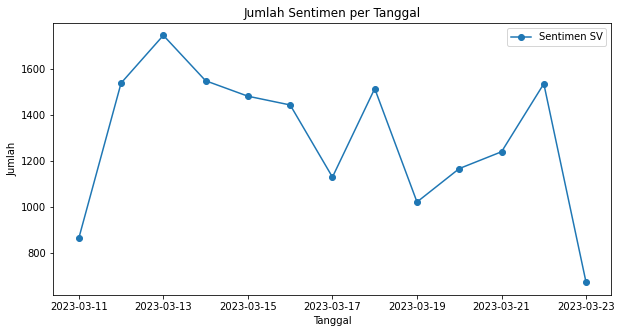

In [30]:
# Mengubah tipe data kolom 'at' menjadi datetime
df['at'] = pd.to_datetime(df['at']).dt.date

# Menghitung jumlah sentimen berdasarkan tanggal
df_sentiment = df.groupby('at')[['sentimentSV']].sum()

# Menghitung jumlah sentimen berdasarkan tanggal dan kelas
df_sentiment_class = df.groupby(['at', 'sentimentSV']).size().unstack(fill_value=0)

# Print jumlah sentimen berdasarkan tanggal
print(df_sentiment)

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 5))

# Memplot data
ax.plot(df_sentiment.index, df_sentiment['sentimentSV'], marker='o', label='Sentimen SV')

# Menambahkan label pada sumbu-sumbu dan judul
ax.set_xlabel('Tanggal')
ax.set_ylabel('Jumlah')
ax.set_title('Jumlah Sentimen per Tanggal')

# Menambahkan legend
ax.legend()

# Menampilkan plot
plt.show()

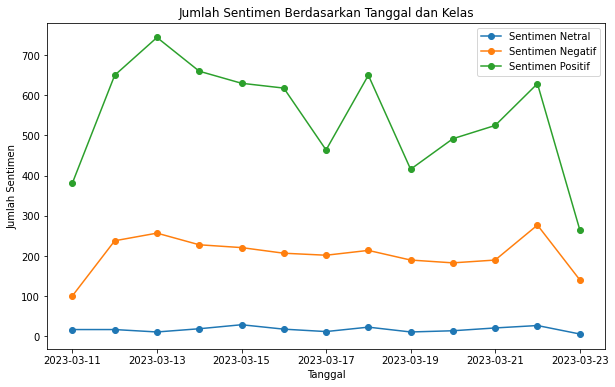

In [31]:
# Mengubah kolom 'at' menjadi tipe datetime
df['at'] = pd.to_datetime(df['at'])

# Mengubah kolom 'at' menjadi indeks dataframe
df = df.set_index('at')

# Menghitung jumlah sentimen berdasarkan kelas 0, 1, dan 2 pada setiap tanggal
sentimen_count = pd.pivot_table(df, values='sentimentSV', index=df.index.date, columns=df['sentimentSV'], aggfunc='count', fill_value=0)

# Mengubah nama kolom dari angka ke string
sentimen_count.columns = ['Sentimen Netral', 'Sentimen Negatif', 'Sentimen Positif']

# Membuat plot jumlah sentimen berdasarkan tanggal dan kelas
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sentimen_count.index, sentimen_count['Sentimen Netral'], marker='o', label='Sentimen Netral')
ax.plot(sentimen_count.index, sentimen_count['Sentimen Negatif'], marker='o', label='Sentimen Negatif')
ax.plot(sentimen_count.index, sentimen_count['Sentimen Positif'], marker='o', label='Sentimen Positif')

# Menambahkan judul dan label sumbu pada plot
ax.set_title('Jumlah Sentimen Berdasarkan Tanggal dan Kelas')
ax.set_xlabel('Tanggal')
ax.set_ylabel('Jumlah Sentimen')
ax.legend()

# Menampilkan plot
plt.show()

# **KREDIVO**

In [33]:
import pandas as pd

# Membaca data dari file csv
df = pd.read_csv('/content/drive/MyDrive/SKRIPSI/kredivoHasil.csv')

In [34]:
df

,userName,score,at,content,sentimentXGB,sentimentSVM,sentimentRF,sentimentSV
0,Yolanna Pritiwi,5,2023-03-22 12:31:21,membatu,2,2,2,2
1,AOMI gmz,5,2023-03-22 12:29:56,sangat terbantu,2,2,2,2
2,Lilis Siti Ambarwati,5,2023-03-22 12:28:16,kredivo smart dan tercepat,2,2,2,2
3,Dika Restu Saputra,5,2023-03-22 12:27:07,mantap sih apk ini bunga rendah,2,2,2,2
4,Zainal Abidin,5,2023-03-22 12:26:05,mantap,2,2,2,2
...,...,...,...,...,...,...,...,...
9995,Nugroho Joko Lestariyo,5,2023-03-05 03:03:23,bagus untuk kebutuhan seharihari tips bayar te...,2,2,2,2
9996,Mohamad Sodiq,5,2023-03-05 03:01:10,aplikasi yang sangat bagus sangat membantu usa...,2,2,2,2
9997,Abah Ompong,5,2023-03-05 02:56:57,bagus,2,2,2,2
9998,Tyas Citra,5,2023-03-05 02:55:27,paling oke,2,2,2,2


            sentimentSV
at                     
2023-03-05         1001
2023-03-06         1201
2023-03-07         1062
2023-03-08          945
2023-03-09          969
2023-03-10         1125
2023-03-11          929
2023-03-12          838
2023-03-13          952
2023-03-14          996
2023-03-15          947
2023-03-16          989
2023-03-17          821
2023-03-18          795
2023-03-19          798
2023-03-20          907
2023-03-21          850
2023-03-22          624


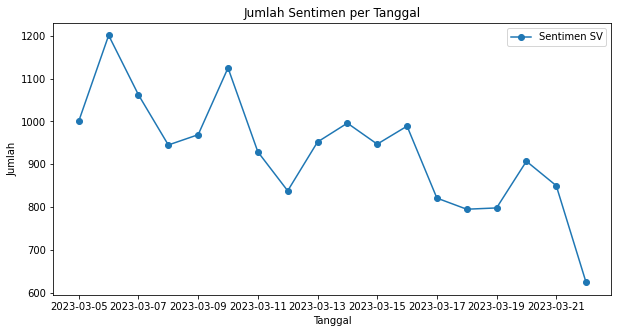

In [36]:
# Mengubah tipe data kolom 'at' menjadi datetime
df['at'] = pd.to_datetime(df['at']).dt.date

# Menghitung jumlah sentimen berdasarkan tanggal
df_sentiment = df.groupby('at')[['sentimentSV']].sum()

# Menghitung jumlah sentimen berdasarkan tanggal dan kelas
df_sentiment_class = df.groupby(['at', 'sentimentSV']).size().unstack(fill_value=0)

# Print jumlah sentimen berdasarkan tanggal
print(df_sentiment)

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 5))

# Memplot data
ax.plot(df_sentiment.index, df_sentiment['sentimentSV'], marker='o', label='Sentimen SV')

# Menambahkan label pada sumbu-sumbu dan judul
ax.set_xlabel('Tanggal')
ax.set_ylabel('Jumlah')
ax.set_title('Jumlah Sentimen per Tanggal')

# Menambahkan legend
ax.legend()

# Menampilkan plot
plt.show()

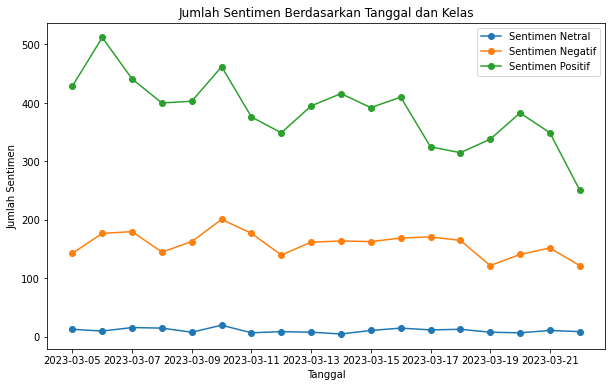

In [37]:
# Mengubah kolom 'at' menjadi tipe datetime
df['at'] = pd.to_datetime(df['at'])

# Mengubah kolom 'at' menjadi indeks dataframe
df = df.set_index('at')

# Menghitung jumlah sentimen berdasarkan kelas 0, 1, dan 2 pada setiap tanggal
sentimen_count = pd.pivot_table(df, values='sentimentSV', index=df.index.date, columns=df['sentimentSV'], aggfunc='count', fill_value=0)

# Mengubah nama kolom dari angka ke string
sentimen_count.columns = ['Sentimen Netral', 'Sentimen Negatif', 'Sentimen Positif']

# Membuat plot jumlah sentimen berdasarkan tanggal dan kelas
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sentimen_count.index, sentimen_count['Sentimen Netral'], marker='o', label='Sentimen Netral')
ax.plot(sentimen_count.index, sentimen_count['Sentimen Negatif'], marker='o', label='Sentimen Negatif')
ax.plot(sentimen_count.index, sentimen_count['Sentimen Positif'], marker='o', label='Sentimen Positif')

# Menambahkan judul dan label sumbu pada plot
ax.set_title('Jumlah Sentimen Berdasarkan Tanggal dan Kelas')
ax.set_xlabel('Tanggal')
ax.set_ylabel('Jumlah Sentimen')
ax.legend()

# Menampilkan plot
plt.show()

# **ADAKAMI**

In [38]:
import pandas as pd

# Membaca data dari file csv
df = pd.read_csv('/content/drive/MyDrive/SKRIPSI/adakamiHasil.csv')

In [39]:
df

,userName,score,at,content,sentimentXGB,sentimentSVM,sentimentRF,sentimentSV
0,Topik Hidayat,3,2023-03-23 13:26:49,kata nya limit pinjaman bisa langsung gede n b...,1,1,2,1
1,Nur Fadilah,5,2023-03-23 13:21:59,alhmdulilah sangat membantu,2,2,2,2
2,CNWBEKASI WARANTY,4,2023-03-23 13:05:14,gooooooddd,2,2,2,1
3,wahyu nanoe,1,2023-03-23 13:03:46,pinjaman saya di tolak dan harus nunggu 1 bula...,1,1,2,1
4,Nissa Yoben,5,2023-03-23 12:57:32,easycash a,2,2,2,2
...,...,...,...,...,...,...,...,...
9995,Chuta Benck Angkie,5,2023-02-15 14:30:06,saya orang baru tapi saya kasi bintang 4 dulu...,2,2,2,2
9996,Hendra Amon,5,2023-02-15 14:27:31,terima kasih sangat membantu mempercepat urusan,2,2,2,2
9997,Nasrun Fajar,3,2023-02-15 14:26:55,udahbeberapa kali langganan skrg cuman di kasi...,1,2,2,1
9998,Hendrik Dhea,5,2023-02-15 14:25:36,sangat membantu,2,2,2,2


            sentimentSV
at                     
2023-02-15           72
2023-02-16          287
2023-02-17          327
2023-02-18          313
2023-02-19          299
2023-02-20          366
2023-02-21          355
2023-02-22          339
2023-02-23          355
2023-02-24          344
2023-02-25          351
2023-02-26          379
2023-02-27          384
2023-02-28          538
2023-03-01          448
2023-03-02          400
2023-03-03          362
2023-03-04          321
2023-03-05          405
2023-03-06          443
2023-03-07          511
2023-03-08          455
2023-03-09          452
2023-03-10          414
2023-03-11          431
2023-03-12          391
2023-03-13          499
2023-03-14          491
2023-03-15          486
2023-03-16          534
2023-03-17          435
2023-03-18          461
2023-03-19          422
2023-03-20          588
2023-03-21          487
2023-03-22          482
2023-03-23          329


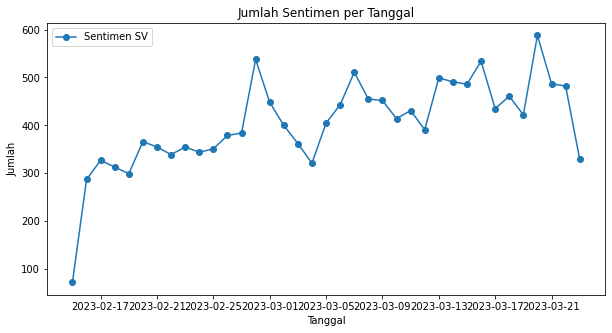

In [40]:
# Mengubah tipe data kolom 'at' menjadi datetime
df['at'] = pd.to_datetime(df['at']).dt.date

# Menghitung jumlah sentimen berdasarkan tanggal
df_sentiment = df.groupby('at')[['sentimentSV']].sum()

# Menghitung jumlah sentimen berdasarkan tanggal dan kelas
df_sentiment_class = df.groupby(['at', 'sentimentSV']).size().unstack(fill_value=0)

# Print jumlah sentimen berdasarkan tanggal
print(df_sentiment)

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 5))

# Memplot data
ax.plot(df_sentiment.index, df_sentiment['sentimentSV'], marker='o', label='Sentimen SV')

# Menambahkan label pada sumbu-sumbu dan judul
ax.set_xlabel('Tanggal')
ax.set_ylabel('Jumlah')
ax.set_title('Jumlah Sentimen per Tanggal')

# Menambahkan legend
ax.legend()

# Menampilkan plot
plt.show()

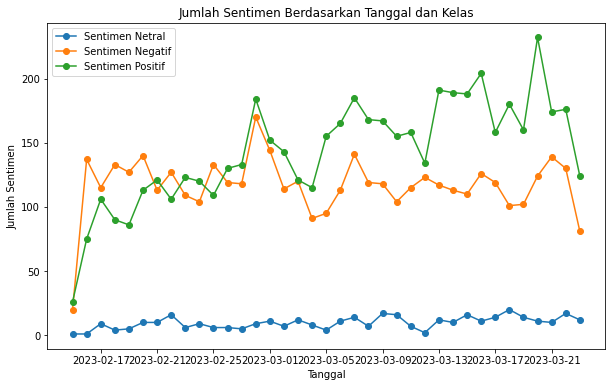

In [41]:
# Mengubah kolom 'at' menjadi tipe datetime
df['at'] = pd.to_datetime(df['at'])

# Mengubah kolom 'at' menjadi indeks dataframe
df = df.set_index('at')

# Menghitung jumlah sentimen berdasarkan kelas 0, 1, dan 2 pada setiap tanggal
sentimen_count = pd.pivot_table(df, values='sentimentSV', index=df.index.date, columns=df['sentimentSV'], aggfunc='count', fill_value=0)

# Mengubah nama kolom dari angka ke string
sentimen_count.columns = ['Sentimen Netral', 'Sentimen Negatif', 'Sentimen Positif']

# Membuat plot jumlah sentimen berdasarkan tanggal dan kelas
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sentimen_count.index, sentimen_count['Sentimen Netral'], marker='o', label='Sentimen Netral')
ax.plot(sentimen_count.index, sentimen_count['Sentimen Negatif'], marker='o', label='Sentimen Negatif')
ax.plot(sentimen_count.index, sentimen_count['Sentimen Positif'], marker='o', label='Sentimen Positif')

# Menambahkan judul dan label sumbu pada plot
ax.set_title('Jumlah Sentimen Berdasarkan Tanggal dan Kelas')
ax.set_xlabel('Tanggal')
ax.set_ylabel('Jumlah Sentimen')
ax.legend()

# Menampilkan plot
plt.show()